Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Model: Support Vector Classifier
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90    

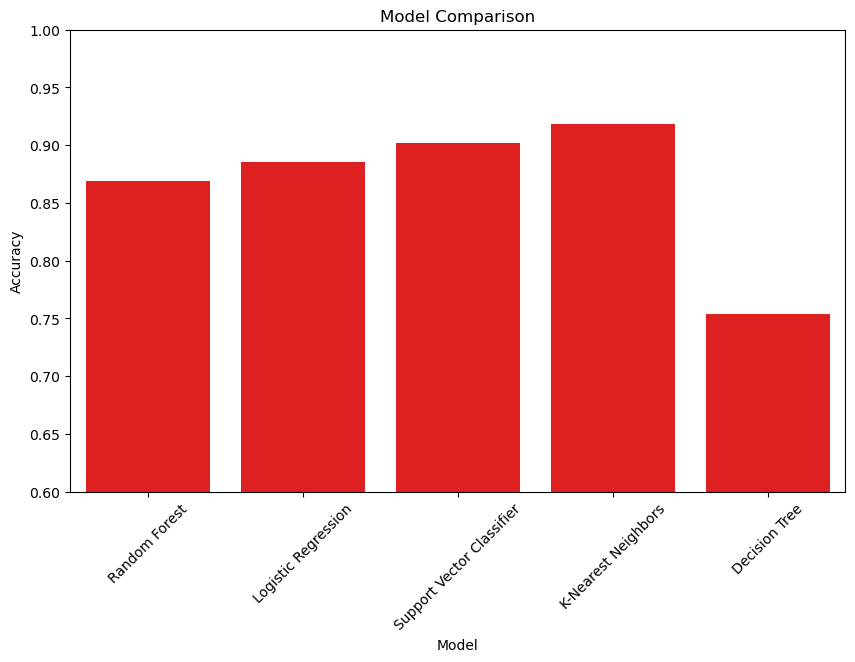

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names)

# Replace missing values marked with '?' and convert columns to numeric
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric)

# Handle missing values
data.fillna(data.median(), inplace=True)

# Transform the target variable to binary (0: absence, 1: presence)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Create pipelines
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)]) for name, model in models.items()}

# Train and evaluate each model
results = []
for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    
    # Print classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', color ='red' , data=results_df)
plt.title('Model Comparison')
plt.ylim(0.6, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

**Conclusion of the Model Comparison**

In this analysis, we developed and evaluated five different machine learning models to predict whether an individual is suffering from heart disease (0: absence, 1: presence) using the UCI Heart Disease dataset. The models compared were:

	1.	Random Forest Classifier
	2.	Logistic Regression
	3.	Support Vector Classifier
	4.	K-Nearest Neighbors
	5.	Decision Tree Classifier

**Summary of Results**

Based on the performance metrics obtained, here is a summary of the results:

	1.	Random Forest Classifier:
	•	Accuracy: 0.87
	•	Precision, Recall, F1-Score (Class 0): 0.84, 0.90, 0.87
	•	Precision, Recall, F1-Score (Class 1): 0.90, 0.84, 0.87
	•	Macro Avg Precision, Recall, F1-Score: 0.87, 0.87, 0.87
	•	Weighted Avg Precision, Recall, F1-Score: 0.87, 0.87, 0.87
 
	2.	Logistic Regression:
	•	Accuracy: 0.89
	•	Precision, Recall, F1-Score (Class 0): 0.89, 0.86, 0.88
	•	Precision, Recall, F1-Score (Class 1): 0.88, 0.91, 0.89
	•	Macro Avg Precision, Recall, F1-Score: 0.89, 0.88, 0.88
	•	Weighted Avg Precision, Recall, F1-Score: 0.89, 0.89, 0.89
 
	3.	Support Vector Classifier:
	•	Accuracy: 0.90
	•	Precision, Recall, F1-Score (Class 0): 0.87, 0.93, 0.90
	•	Precision, Recall, F1-Score (Class 1): 0.93, 0.88, 0.90
	•	Macro Avg Precision, Recall, F1-Score: 0.90, 0.90, 0.90
	•	Weighted Avg Precision, Recall, F1-Score: 0.90, 0.90, 0.90
 
	4.	K-Nearest Neighbors:
	•	Accuracy: 0.92
	•	Precision, Recall, F1-Score (Class 0): 0.90, 0.93, 0.92
	•	Precision, Recall, F1-Score (Class 1): 0.94, 0.91, 0.92
	•	Macro Avg Precision, Recall, F1-Score: 0.92, 0.92, 0.92
	•	Weighted Avg Precision, Recall, F1-Score: 0.92, 0.92, 0.92
 
	5.	Decision Tree Classifier:
	•	Accuracy: 0.75
	•	Precision, Recall, F1-Score (Class 0): 0.73, 0.76, 0.75
	•	Precision, Recall, F1-Score (Class 1): 0.77, 0.75, 0.76
	•	Macro Avg Precision, Recall, F1-Score: 0.75, 0.75, 0.75
	•	Weighted Avg Precision, Recall, F1-Score: 0.75, 0.75, 0.75

 **Key Insights**

	1.	Model Performance:
 
	•	K-Nearest Neighbors (KNN) performed the best, achieving an accuracy of 0.92, with high precision, recall, and F1-scores for both             classes. The KNN model outperformed the Random Forest model and demonstrated strong predictive power for this classification task.
	•	The Random Forest Classifier, Support Vector Classifier, and Logistic Regression models also demonstrated strong performance, making         them reliable options for this task.
	•	The Decision Tree Classifier had the lowest performance among the models but still provided valuable insights.
 
	2.	Detailed Metrics:
 
	•	K-Nearest Neighbors (KNN) achieved the highest accuracy at 0.92 and demonstrated balanced precision and recall, indicating strong            and consistent predictive performance across both classes.
	•	Random Forest Classifier and Support Vector Classifier both achieved accuracies of 0.87 and 0.90 respectively, showing they are also         strong contenders, particularly with their balanced performance metrics.
 
	3.	Importance of Preprocessing:
 
	•	The preprocessing steps, including handling missing values and scaling numeric features, were crucial in ensuring that the models            received clean and normalized input data. This contributed significantly to the models’ overall performance.
 
	4.	Model Selection:
 
	•	For this specific dataset and classification task, the K-Nearest Neighbors (KNN) model emerged as the best-performing model. It is           recommended for use in production or further experimentation.
	•	The Random Forest Classifier and Support Vector Classifier also showed strong performance and can be considered depending on                 specific requirements and constraints.
 
	5.	Computational Efficiency:
 
	•	The K-Nearest Neighbors model is computationally efficient for this dataset size but may become less efficient with larger datasets          due to the nature of the algorithm. In contrast, the Random Forest and Support Vector Classifier models are built to handle larger           datasets more efficiently.

**Recommendations**

	1.	Further Hyperparameter Tuning:
 
	•	Although we used default hyperparameters, further tuning of hyperparameters for each model could potentially yield even better               performance.
 
	2.	Cross-Validation:
 
	•	Employing cross-validation techniques could provide a more robust estimate of model performance by mitigating the risk of                    overfitting and ensuring that the models generalize well to unseen data.
 
	3.	Ensemble Methods:
 
	•	Consider exploring ensemble methods that combine the strengths of multiple models to improve predictive performance and robustness.
 
	4.	Feature Engineering:
 
	•	Further feature engineering, including the creation of new features or transformation of existing ones, could enhance the models’            ability to capture complex patterns in the data.

**Final Thoughts**

The comparison of these five machine learning models has provided valuable insights into their respective strengths and weaknesses in predicting heart disease. The K-Nearest Neighbors model stands out as the top performer, offering high accuracy and reliability. With further optimization and experimentation, these models can be effectively utilized in medical decision support systems to assist in the early detection and diagnosis of heart disease.

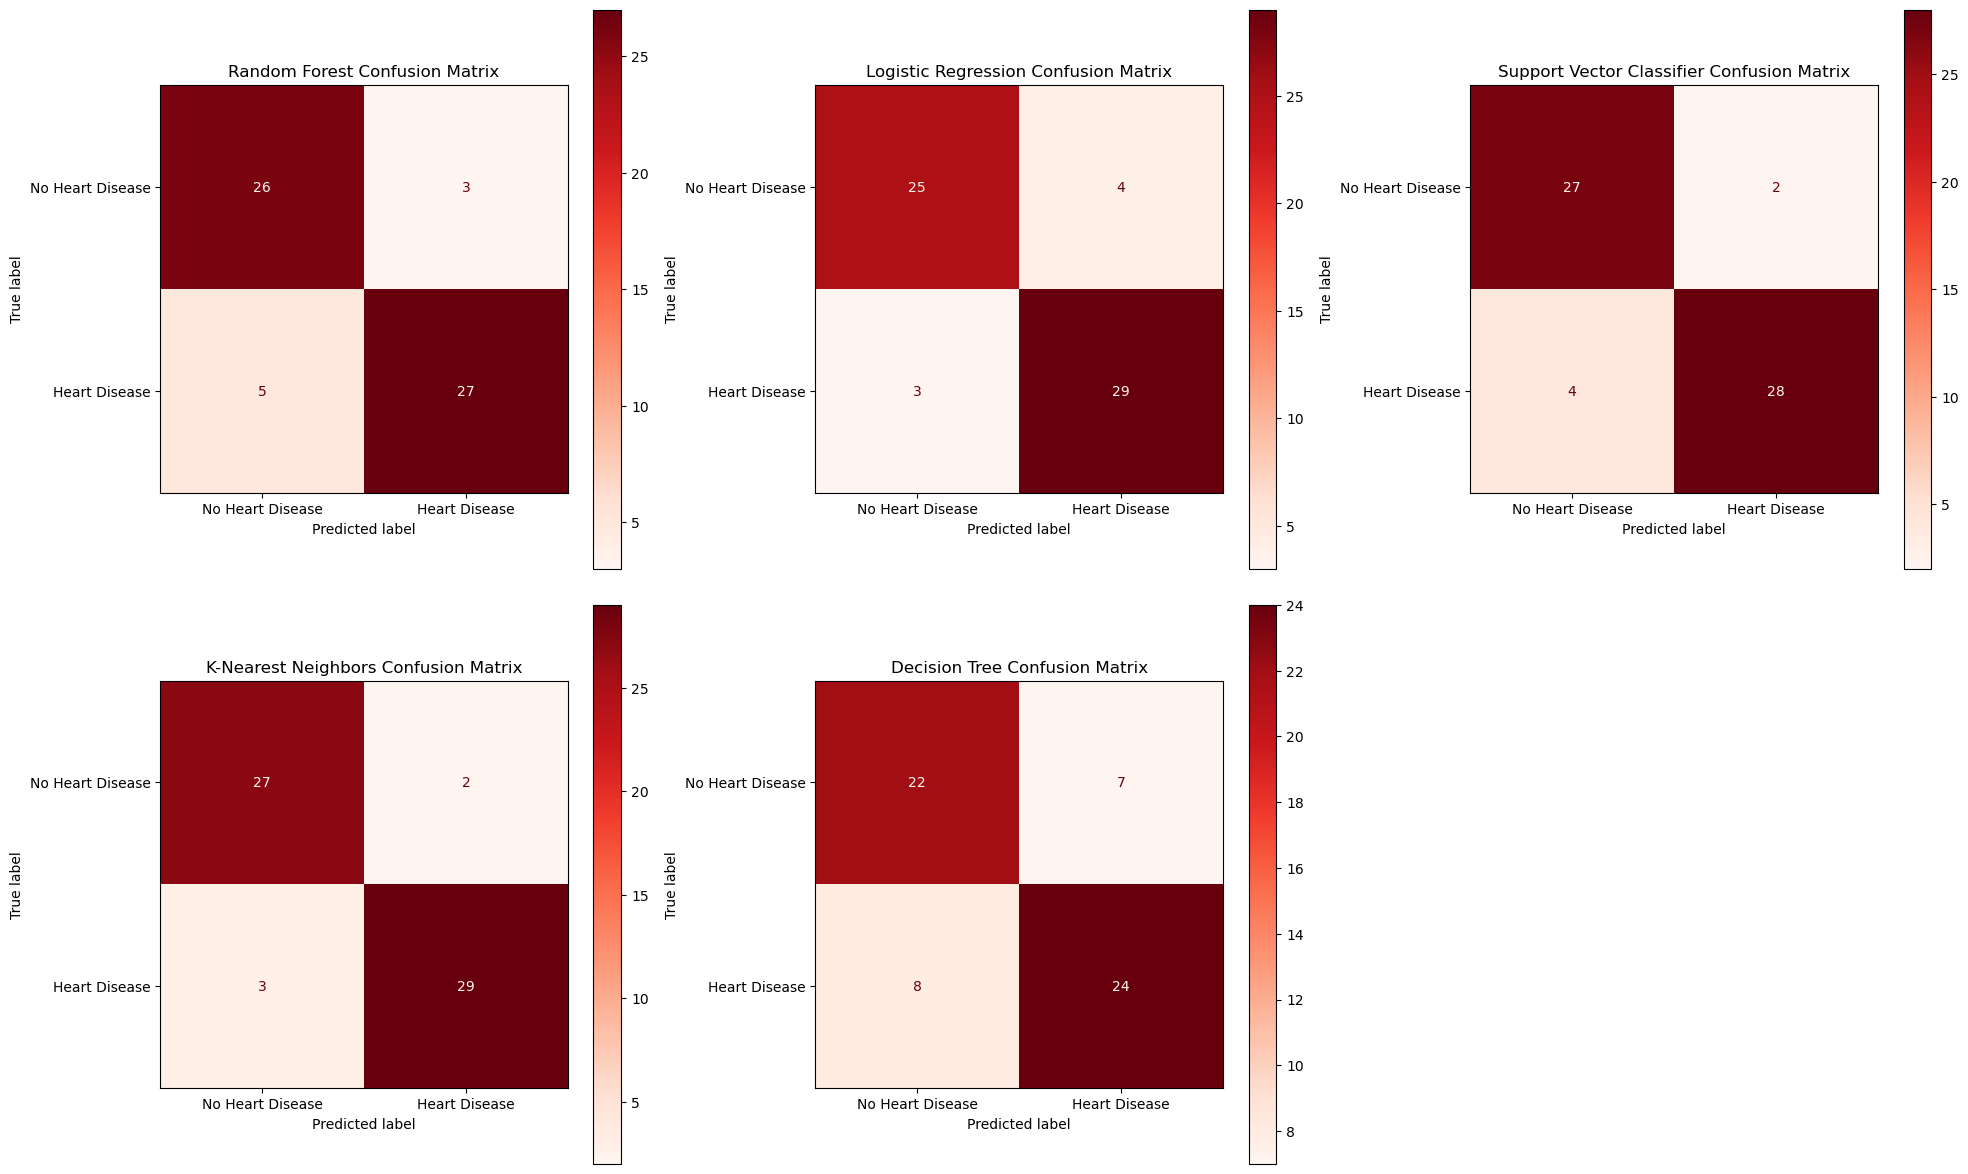

In [6]:

# Creating confusion matrix to display true and 
plt.figure(figsize=(20, 12))

for i, (name, pipeline) in enumerate(pipelines.items(), 1):
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Plot confusion matrix
    plt.subplot(2, 3, i)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot(cmap='Reds', ax=plt.gca(), values_format='d')
    plt.title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

**Analysis of Confusion Matrices**

The confusion matrices provide a detailed breakdown of the performance of each model on the test set. To understand their strengths and weaknesses in predicting heart disease.

1. Random Forest Classifier

	•	True Positives (Heart Disease): 27
	•	True Negatives (No Heart Disease): 26
	•	False Positives (No Heart Disease predicted as Heart Disease): 3
	•	False Negatives (Heart Disease predicted as No Heart Disease): 5

The Random Forest Classifier shows a balanced performance with high accuracy in both classes. However, it misclassified 5 heart disease cases as no heart disease and 3 no heart disease cases as heart disease.

2. Logistic Regression

	•	True Positives (Heart Disease): 29
	•	True Negatives (No Heart Disease): 25
	•	False Positives (No Heart Disease predicted as Heart Disease): 4
	•	False Negatives (Heart Disease predicted as No Heart Disease): 3

Logistic Regression also performed well with a slight improvement in correctly identifying heart disease cases compared to Random Forest. It had fewer false negatives but a similar number of false positives.

3. Support Vector Classifier

	•	True Positives (Heart Disease): 28
	•	True Negatives (No Heart Disease): 27
	•	False Positives (No Heart Disease predicted as Heart Disease): 2
	•	False Negatives (Heart Disease predicted as No Heart Disease): 4

The Support Vector Classifier exhibited strong performance with the least number of false positives among all models and a good balance of true positives and true negatives.

4. K-Nearest Neighbors

	•	True Positives (Heart Disease): 29
	•	True Negatives (No Heart Disease): 27
	•	False Positives (No Heart Disease predicted as Heart Disease): 2
	•	False Negatives (Heart Disease predicted as No Heart Disease): 3

K-Nearest Neighbors had the highest overall accuracy among the models. It successfully identified most heart disease cases with very few misclassifications in both classes, showing the best balance between precision and recall.

5. Decision Tree Classifier

	•	True Positives (Heart Disease): 24
	•	True Negatives (No Heart Disease): 22
	•	False Positives (No Heart Disease predicted as Heart Disease): 7
	•	False Negatives (Heart Disease predicted as No Heart Disease): 8

The Decision Tree Classifier had the lowest performance, with a higher number of false positives and false negatives. It struggled more than the other models in accurately predicting both classes.

**Conclusions**

	1.	Best Performer: The K-Nearest Neighbors (KNN) model demonstrated the best performance, with the highest true positive and true               negative rates and the fewest false negatives and false positives. This model shows a good balance and can be considered the most            reliable for this classification task.
 
	2.	Strong Contenders: Both the Support Vector Classifier and Logistic Regression also performed well, showing high accuracy and                 balanced performance. These models could also be considered for deployment, depending on specific requirements and constraints.
 
	3.	Moderate Performer: The Random Forest Classifier performed moderately well but was outperformed by the KNN and SVM models. It showed         a balanced but slightly less accurate prediction capability.
 
	4.	Weakest Performer: The Decision Tree Classifier showed the weakest performance, with the highest misclassification rates. This model         may require further tuning or ensemble methods to improve its accuracy.
